# SALES PREDICTION USING PYTHON

1) Sales prediction involves forecasting the amount of a product that
customers will purchase, taking into account various factors such as
advertising expenditure, target audience segmentation, and
advertising platform selection.
2) In businesses that offer products or services, the role of a Data
Scientist is crucial for predicting future sales. They utilize machine
learning techniques in Python to analyze and interpret data, allowing
them to make informed decisions regarding advertising costs. By
leveraging these predictions, businesses can optimize their
advertising strategies and maximize sales potential. Let's embark on
the journey of sales prediction using machine learning in Python. 

In [34]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# warnings
import warnings
warnings.filterwarnings('ignore')

# split data & data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Linear Regression
from sklearn.linear_model import LinearRegression

# Polynomial features
from sklearn.preprocessing import PolynomialFeatures

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

# calculate accuracy
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score

In [4]:
df = pd.read_csv("advertising.csv")
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
df.shape

(200, 4)

In [7]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [10]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

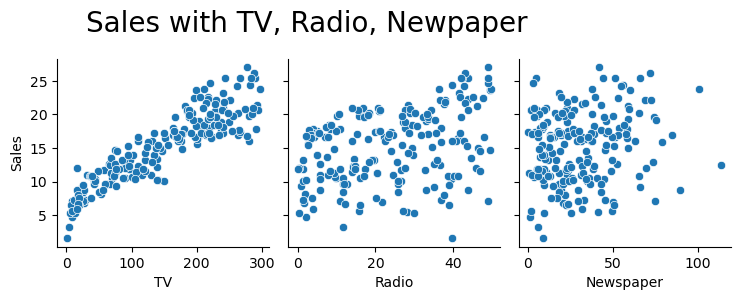

In [57]:
sns.pairplot(df, x_vars = ["TV", "Radio", "Newspaper"], y_vars = "Sales")
plt.title("Sales with TV, Radio, Newpaper", y = 1.1, x = -1, size = 20)

plt.show()

### Data spliting, training & testing

In [42]:
x = df[["TV", "Radio", "Newspaper"]].values
y = df["Sales"].values

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = .1, random_state = 20)

In [44]:
reg = LinearRegression()

In [45]:
reg.fit(x_train, y_train)

LinearRegression()

In [46]:
y_pred = reg.predict(x_test)

In [47]:
mean_err = mean_absolute_error(y_test, y_pred)
mean_sqd_err = mean_squared_error(y_test, y_pred)
r2_scr = r2_score(y_test, y_pred)

print(" Mean absolute error:", mean_err, "\n", "Mean squared error:", mean_sqd_err, "\n", "R-squared score:", r2_scr)

 Mean absolute error: 1.7523501914823345 
 Mean squared error: 4.832232669219146 
 R-squared score: 0.8691071729792152


In [49]:
length = np.arange(len(y_pred))

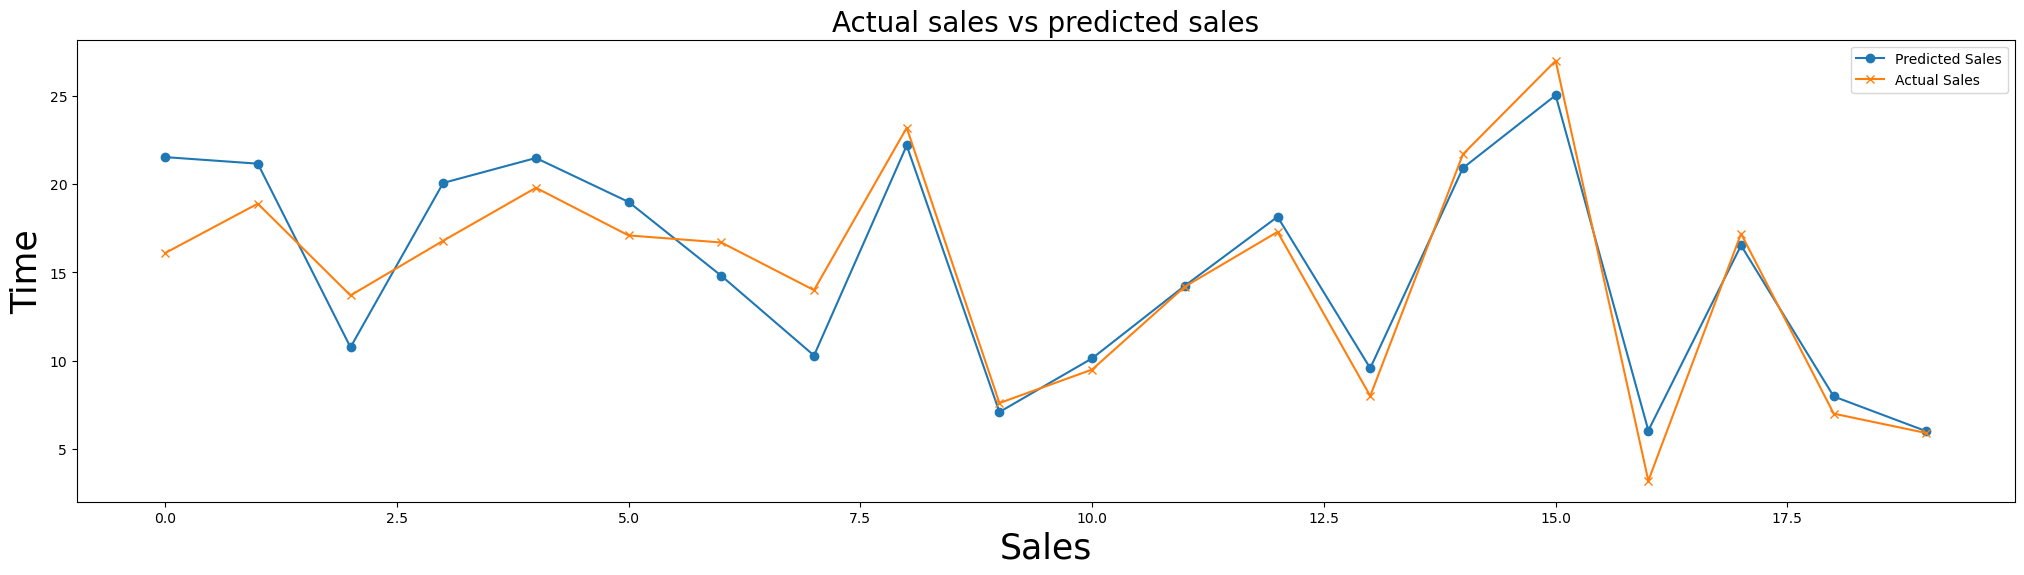

In [54]:
plt.figure(figsize = (25, 6))

plt.plot(length, y_pred, label = "Predicted Sales", marker = "o")
plt.plot(length, y_test, label = "Actual Sales", marker = "x")
plt.title("Actual sales vs predicted sales", size = 20)
plt.ylabel("Time", size = 25)
plt.xlabel("Sales", size = 25)

plt.legend()
plt.show()

In [55]:
pred_err = y_test - y_pred

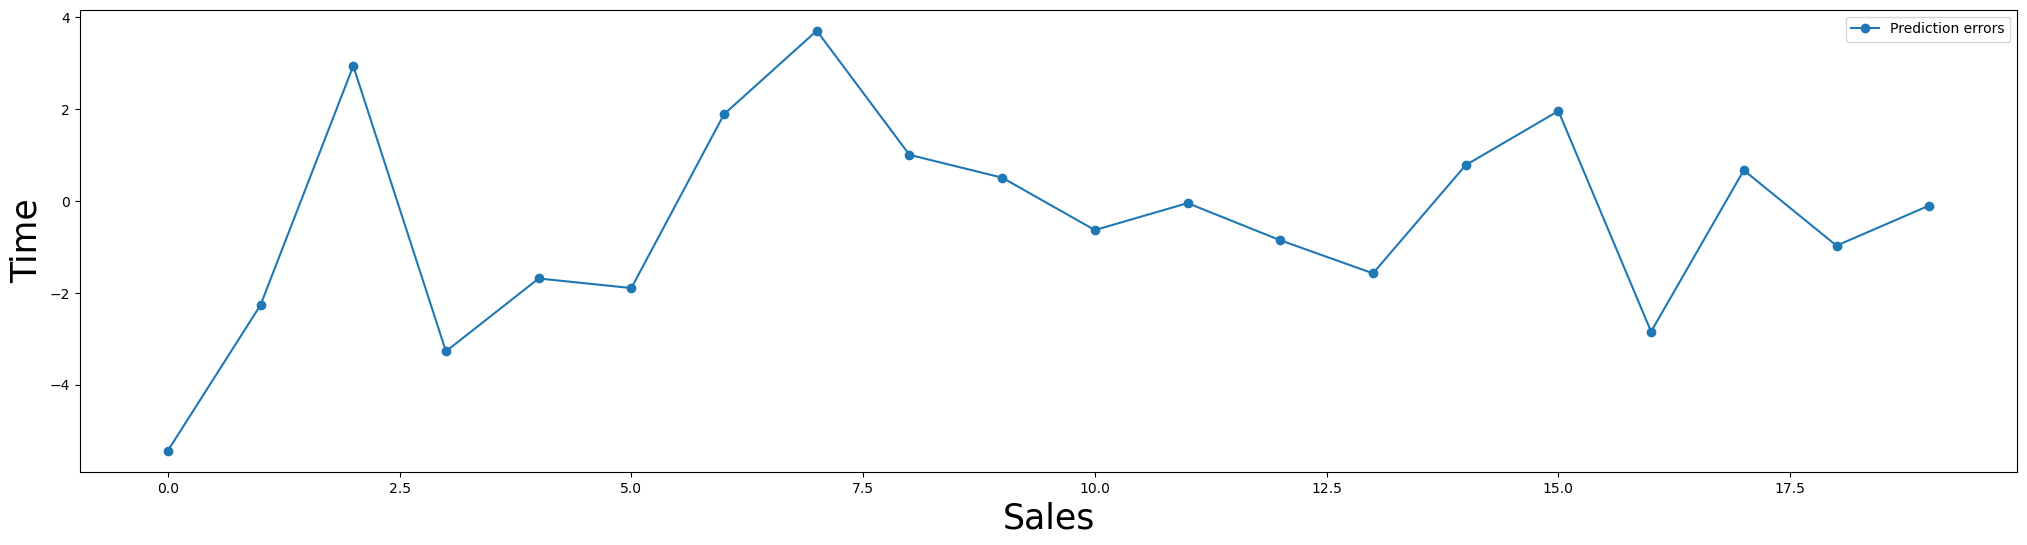

In [56]:
plt.figure(figsize = (25, 6))

plt.plot(length, pred_err, label = "Prediction errors", marker = "o")
plt.ylabel("Time", size = 25)
plt.xlabel("Sales", size = 25)

plt.legend()
plt.show()

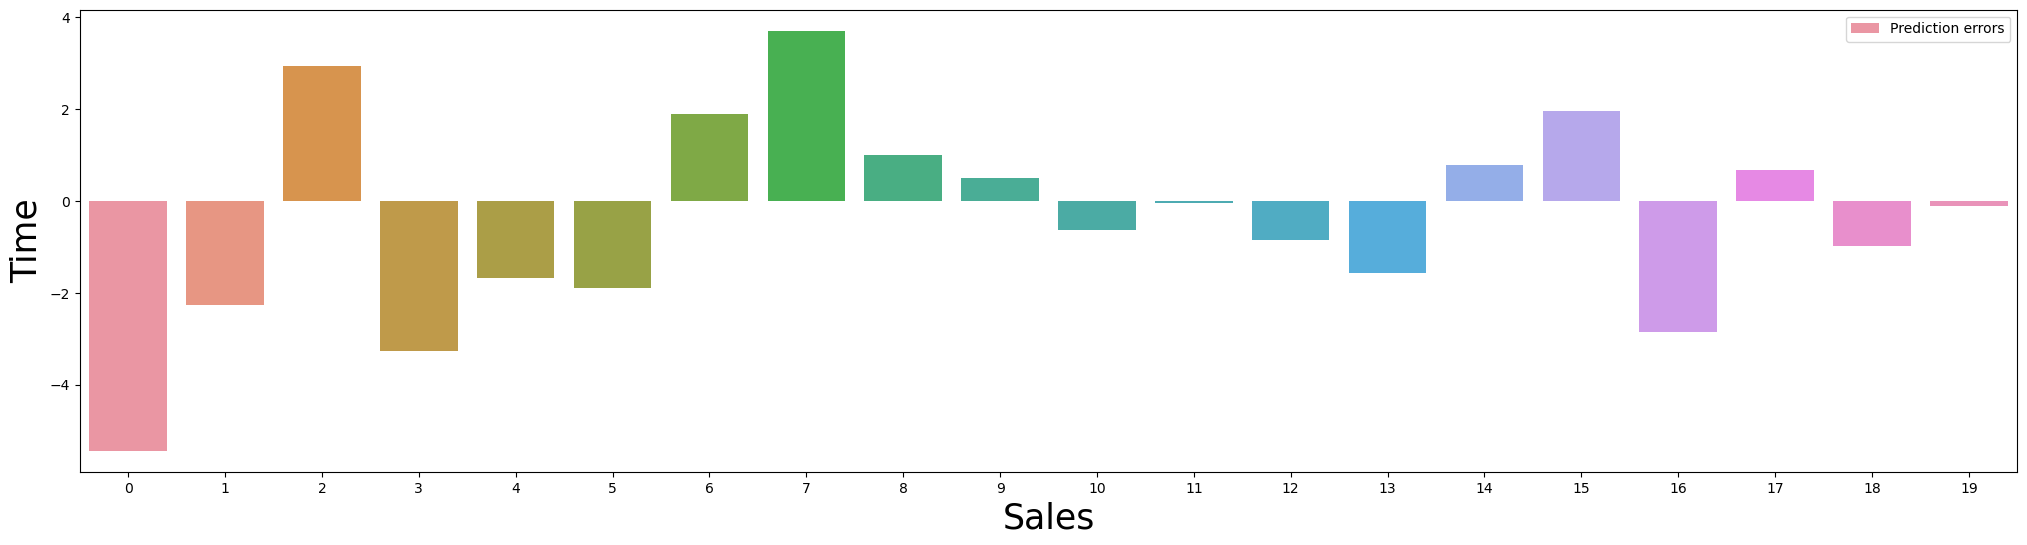

In [59]:
plt.figure(figsize = (25, 6))

sns.barplot(length, pred_err, label = "Prediction errors")
plt.ylabel("Time", size = 25)
plt.xlabel("Sales", size = 25)

plt.legend()
plt.show()